In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
# load dataset
data = pd.read_csv("/content/Maternal Health Risk Data Set.csv")
print(data)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]


In [42]:
data.head

<bound method NDFrame.head of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [43]:
data.tail

<bound method NDFrame.tail of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [44]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [46]:
data.shape

(1014, 7)

In [47]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [48]:
data_dup = data.duplicated().any()
data_dup


True

In [49]:
data = data.drop_duplicates()
data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86  high risk
1     35         140           90  13.0      98.0         70  high risk
2     29          90           70   8.0     100.0         80  high risk
3     30         140           85   7.0      98.0         70  high risk
4     35         120           60   6.1      98.0         76   low risk
..   ...         ...          ...   ...       ...        ...        ...
673   12         100           50   6.4      98.0         70   mid risk
674   15         100           60   6.0      98.0         80   low risk
703   15         100           49   7.6      98.0         77   low risk
704   12         100           50   6.0      98.0         70   mid risk
705   21         100           50   6.8      98.0         60   low risk

[452 rows x 7 columns]

In [50]:
ca_val=[]
co_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)
#Categorical Data
ca_val

['BodyTemp', 'RiskLevel']

In [51]:
data['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [52]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [53]:
#Continuous Value
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [54]:
data['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [55]:
data['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [56]:
data['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [57]:
data['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [58]:
data['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [59]:
risk_map = {'low risk': 1, 'mid risk': 2, 'high risk': 3}
data['RiskLevel'] = data['RiskLevel'].map(risk_map)
data['RiskLevel'].fillna(0, inplace=True)
data['RiskLevel'] = data['RiskLevel'].astype(int)
data


<ipython-input-59-c988bce198e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RiskLevel'] = data['RiskLevel'].map(risk_map)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-59-c988bce198e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86          3
1     35         140           90  13.0      98.0         70          3
2     29          90           70   8.0     100.0         80          3
3     30         140           85   7.0      98.0         70          3
4     35         120           60   6.1      98.0         76          1
..   ...         ...          ...   ...       ...        ...        ...
673   12         100           50   6.4      98.0         70          2
674   15         100           60   6.0      98.0         80          1
703   15         100           49   7.6      98.0         77          1
704   12         100           50   6.0      98.0         70          2
705   21         100           50   6.8      98.0         60          1

[452 rows x 7 columns]

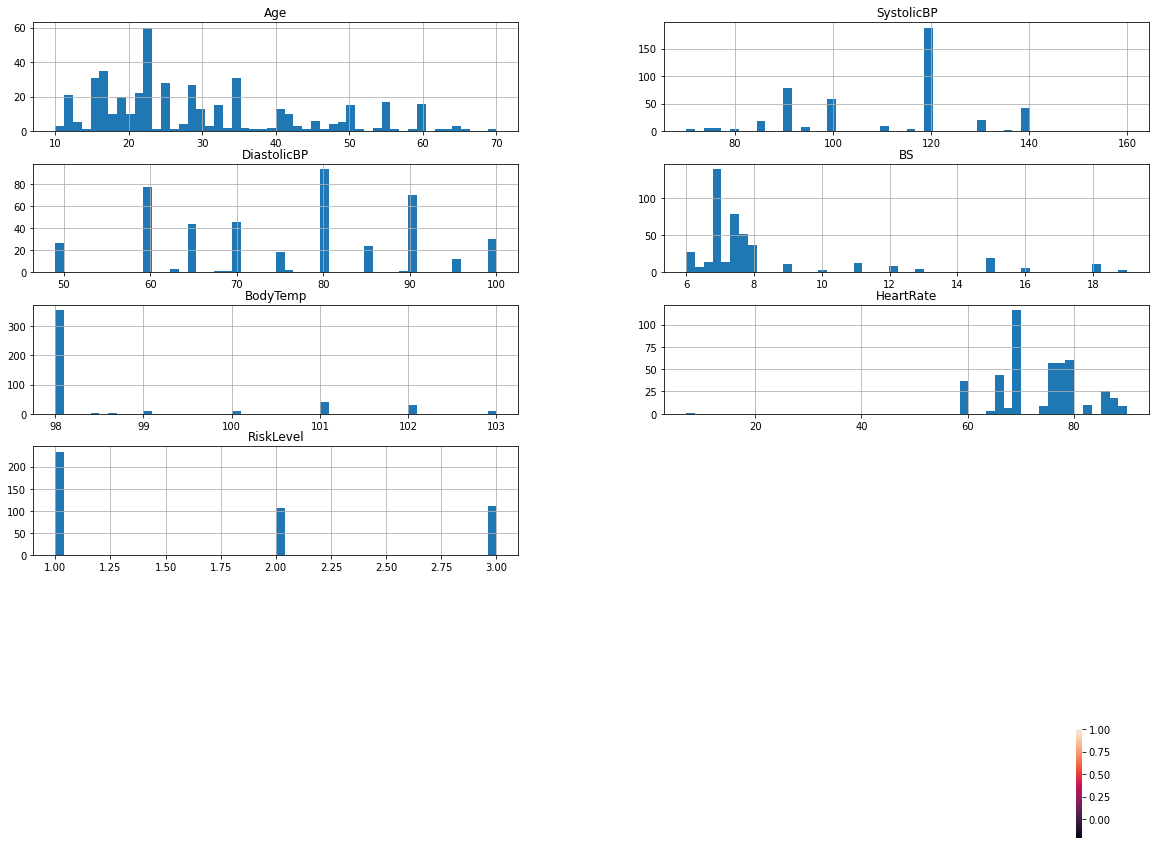

In [60]:


# Calculating the summary statistics for numerical columns
data_stats = data.describe()

# Calculating the correlation between RiskLevel and other columns
corr_matrix = data.corr()['RiskLevel'].drop('RiskLevel')
# Plotting histograms for each numerical column
data.hist(bins=50, figsize=(20, 15), layout=(6, 2))

# Plotting a correlation matrix for all columns
sns.heatmap(data.corr(), annot=True)




In [61]:

data['RiskLevel'].value_counts()
data.describe()

Age  SystolicBP  DiastolicBP          BS    BodyTemp  \
count  452.000000  452.000000   452.000000  452.000000  452.000000   
mean    29.194690  110.553097    75.418142    8.346173   98.692478   
std     13.767379   17.872282    13.754578    2.829209    1.410897   
min     10.000000   70.000000    49.000000    6.000000   98.000000   
25%     19.000000   90.000000    65.000000    6.900000   98.000000   
50%     25.000000  120.000000    80.000000    7.500000   98.000000   
75%     35.000000  120.000000    86.000000    7.900000   98.000000   
max     70.000000  160.000000   100.000000   19.000000  103.000000   

        HeartRate   RiskLevel  
count  452.000000  452.000000  
mean    73.949115    1.730088  
std      8.156973    0.833169  
min      7.000000    1.000000  
25%     70.000000    1.000000  
50%     76.000000    1.000000  
75%     80.000000    2.000000  
max     90.000000    3.000000

In [62]:
#calculates the number of occurrences of each value in the RiskLevel column
value_counts = data['RiskLevel'].value_counts()


In [63]:
#proportion of each value as a percentage of the total number of rows.
value_counts_pct = value_counts * 100 / len(data)



Text(0.5, 1.0, 'Occurrences of Risk Level')

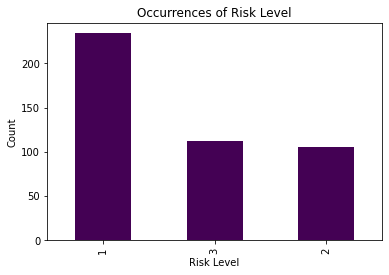

In [64]:
value_counts.plot(kind='bar', color='#440154')
plt.ylabel('Count')
plt.xlabel('Risk Level')
plt.title('Occurrences of Risk Level')


In [65]:
#spliting the data
X = data.drop('RiskLevel',axis=1)
y = data['RiskLevel']


In [66]:
X

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0     25         130           80  15.0      98.0         86
1     35         140           90  13.0      98.0         70
2     29          90           70   8.0     100.0         80
3     30         140           85   7.0      98.0         70
4     35         120           60   6.1      98.0         76
..   ...         ...          ...   ...       ...        ...
673   12         100           50   6.4      98.0         70
674   15         100           60   6.0      98.0         80
703   15         100           49   7.6      98.0         77
704   12         100           50   6.0      98.0         70
705   21         100           50   6.8      98.0         60

[452 rows x 6 columns]

In [67]:
y

0      3
1      3
2      3
3      3
4      1
      ..
673    2
674    1
703    1
704    2
705    1
Name: RiskLevel, Length: 452, dtype: int64

In [68]:
#training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Training shapes:
X_train: (316, 6)
y_train: (316,)
Testing shapes:
X_test: (136, 6)
y_test: (136,)


In [69]:
#using StandardScaler to fit the training data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [70]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("/content/Maternal Health Risk Data Set.csv")





In [71]:
risk_map = {'low risk': 1, 'mid risk': 2, 'high risk': 3}
data['RiskLevel'] = data['RiskLevel'].map(risk_map)
data['RiskLevel'].fillna(0, inplace=True)
data['RiskLevel'] = data['RiskLevel'].astype(int)
data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          3
1      35         140           90  13.0      98.0         70          3
2      29          90           70   8.0     100.0         80          3
3      30         140           85   7.0      98.0         70          3
4      35         120           60   6.1      98.0         76          1
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          3
1010   55         120           90  18.0      98.0         60          3
1011   35          85           60  19.0      98.0         86          3
1012   43         120           90  18.0      98.0         70          3
1013   32         120           65   6.0     101.0         76          2

[1014 rows x 7 columns]

In [72]:
# Split the dataset into features and labels
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [73]:
# Balance the dataset using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Store the balanced dataset in a new dataframe
data_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data_balanced.to_csv("/content/Maternal Health Risk Data Set.csv", index=False)


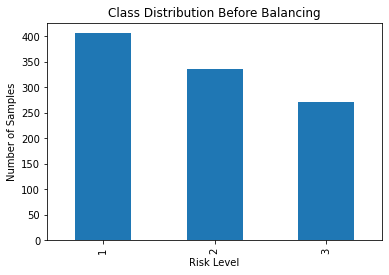

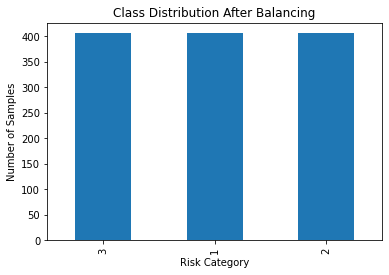

In [74]:
# Plot the class distribution before balancing
plt.figure()
data['RiskLevel'].value_counts().plot(kind='bar', title='Class Distribution Before Balancing')
plt.xlabel('Risk Level')
plt.ylabel('Number of Samples')
plt.show()

# Balance the dataset using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot the class distribution after balancing
plt.figure()
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class Distribution After Balancing')
plt.xlabel('Risk Category')
plt.ylabel('Number of Samples')
plt.show()





In [75]:
from sklearn.preprocessing import StandardScaler
# Print the mean and standard deviation of the features before scaling
print("Mean of features before scaling:", X.mean(axis=0))
print("Standard deviation of features before scaling:", X.std(axis=0))

# Scale the features
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Store the scaled dataset in a new dataframe
data_scaled = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame(y)], axis=1)
data_scaled.to_csv("/content/Maternal Health Risk Data Set.csv", index=False)

# Print the mean and standard deviation of the features after scaling
print("Mean of features after scaling:", X_scaled.mean(axis=0))
print("Standard deviation of features after scaling:", X_scaled.std(axis=0))

Mean of features before scaling: Age             29.871795
SystolicBP     113.198225
DiastolicBP     76.460552
BS               8.725986
BodyTemp        98.665089
HeartRate       74.301775
dtype: float64
Standard deviation of features before scaling: Age            13.474386
SystolicBP     18.403913
DiastolicBP    13.885796
BS              3.293532
BodyTemp        1.371384
HeartRate       8.088702
dtype: float64
Mean of features after scaling: [-4.90512737e-17 -7.70805729e-17  4.69490762e-16 -2.13723407e-16
  2.15124872e-15  1.36642834e-16]
Standard deviation of features after scaling: [1. 1. 1. 1. 1. 1.]


In [76]:
#training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training shapes:
X_train: (709, 6)
y_train: (709,)
Testing shapes:
X_test: (305, 6)
y_test: (305,)


Train accuracy: 0.8519040902679831
Test accuracy: 0.7278688524590164
[2 3 3 1 1 1 1 2 2 1 3 1 1 1 2 2 3 1 1 2 2 2 2 3 1 1 3 2 2 1 1 3 1 2 1 3 3
 2 1 3 2 2 3 3 1 2 3 2 1 1 1 1 1 2 2 2 3 1 1 2 1 1 2 2 1 3 2 1 2 1 3 3 2 2
 2 3 1 2 3 1 1 2 1 1 2 1 1 2 3 2 2 3 1 3 2 1 2 1 3 2 1 3 1 1 2 2 1 2 1 2 2
 1 1 3 3 1 1 3 2 3 2 1 1 2 1 3 2 2 1 2 1 1 2 2 1 1 3 2 1 1 3 2 3 3 1 1 3 1
 1 2 1 2 2 2 3 2 1 2 1 3 1 1 1 2 1 2 3 2 1 1 3 1 2 1 1 3 2 2 1 1 3 1 2 3 3
 1 3 1 1 1 2 2 2 1 1 1 2 3 1 1 2 2 3 3 2 1 1 3 2 2 3 2 1 1 1 3 2 3 1 1 3 3
 2 2 2 1 2 1 3 2 1 2 2 1 2 1 1 1 2 3 1 1 1 1 2 3 1 1 1 1 3 3 2 2 3 1 1 3 3
 3 1 2 2 2 2 3 2 2 3 1 3 3 1 2 3 3 1 2 3 1 1 1 1 3 3 2 3 1 2 1 3 2 1 1 1 3
 3 1 2 1 3 1 2 3 1]
CM: [[89 26  2]
 [33 69 10]
 [ 6  6 64]]
Accuracy: 72.78688524590164 %
              precision    recall  f1-score   support

           1       0.70      0.76      0.73       117
           2       0.68      0.62      0.65       112
           3       0.84      0.84      0.84        76

    accuracy          

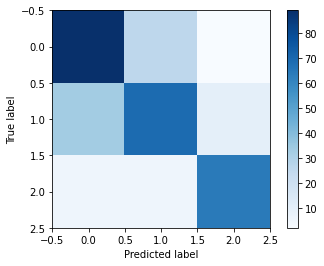

In [77]:
from sklearn.metrics import confusion_matrix
#Applying XGBoost
import xgboost as xgb
classifier = xgb.XGBClassifier()
# Train the XGBoost classifier
classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = classifier.predict(X_test)
#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
cm = confusion_matrix(y_test, y_pred)
print("Train accuracy:",xgb_clf.score(X_train,y_train))
print("Test accuracy:",xgb_clf.score(X_test,y_test))
y_pred = classifier.predict(X_test)
print(y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, xgb_clf.predict(X_test)))

cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

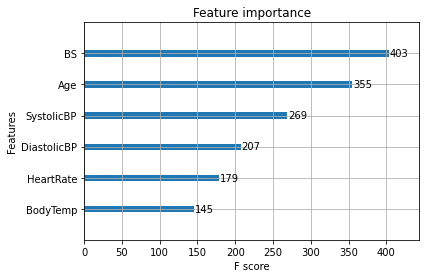

In [78]:
# Train an XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(clf, max_num_features=10)
plt.show()

Train accuracy: 0.9464033850493653
Test accuracy: 0.7934426229508197
[2 3 3 1 1 2 2 2 2 1 3 2 2 3 2 2 3 1 1 2 2 2 3 3 3 2 3 1 1 1 2 3 1 2 1 3 3
 1 1 3 3 1 3 3 1 2 3 2 1 1 2 1 1 2 2 2 3 1 1 2 1 2 2 1 1 3 2 3 2 3 3 3 2 2
 2 3 3 2 3 1 1 2 1 1 2 1 1 2 3 2 2 3 1 3 2 1 2 1 3 2 1 3 1 1 2 2 1 2 1 2 2
 2 1 3 2 1 1 3 2 3 2 1 1 2 3 3 2 2 2 2 1 1 2 2 1 1 3 2 1 2 3 2 3 3 1 1 3 1
 1 2 1 2 1 2 3 2 1 2 1 3 1 1 1 2 1 2 2 2 1 1 3 1 2 1 2 3 2 2 1 1 3 2 1 3 3
 1 3 1 2 1 2 2 2 2 1 2 2 3 1 2 2 2 3 3 2 2 2 3 2 2 3 2 1 1 2 3 2 3 1 1 3 3
 2 2 2 2 2 1 3 2 1 2 2 1 2 2 1 1 2 3 1 1 1 1 2 3 1 1 1 1 3 3 3 2 3 1 1 3 3
 3 2 2 2 2 2 3 2 2 3 1 3 3 1 2 3 3 1 1 3 1 2 1 1 3 3 2 3 1 2 2 3 2 1 1 1 3
 3 1 2 1 3 3 2 3 2]
CM: [[86 25  6]
 [16 87  9]
 [ 1  6 69]]
Accuracy: 79.34426229508198 %
              precision    recall  f1-score   support

           1       0.83      0.74      0.78       117
           2       0.74      0.78      0.76       112
           3       0.82      0.91      0.86        76

    accuracy          

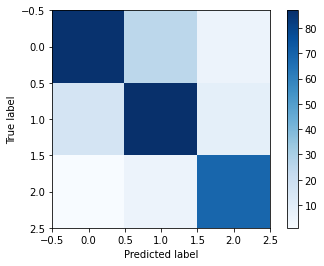

In [79]:
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [80]:
from sklearn import tree
# Train a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test, y_test)

# Visualize the decision tree
plt.figure(figsize=(300, 150))
tree.plot_tree(clf, filled=True)
plt.show()

Training Accuracy: 0.8928067700987306
Testing Accuracy: 0.7540983606557377
Accuracy: 0.7540983606557377
[2 3 3 1 1 1 2 2 2 1 3 1 1 1 2 2 3 1 1 2 2 2 2 3 1 2 3 2 2 1 1 3 1 2 1 3 3
 2 1 3 3 2 3 3 1 2 3 2 1 1 1 1 1 2 2 2 3 1 1 2 1 1 2 2 1 3 2 3 2 3 3 3 2 2
 2 3 1 2 3 1 1 2 1 2 2 1 1 2 3 2 2 3 1 3 2 1 2 1 3 2 1 3 1 1 2 2 1 2 1 2 2
 2 1 3 2 1 1 3 2 3 2 1 1 2 1 3 2 2 1 2 1 1 2 2 1 2 3 2 1 2 3 2 3 3 1 1 3 1
 1 2 1 2 1 2 3 2 1 2 1 3 1 1 1 2 1 2 3 2 1 1 3 1 2 1 1 3 2 2 1 1 3 1 2 3 3
 1 3 1 1 1 2 2 2 2 1 1 2 3 1 2 2 2 3 3 2 1 2 3 2 2 3 2 1 1 1 3 2 3 1 1 3 3
 2 2 2 2 2 1 3 2 1 2 2 1 2 2 1 1 2 3 1 1 1 1 2 3 1 1 1 1 3 3 3 2 3 1 1 3 3
 3 2 2 2 2 2 3 2 2 3 1 3 3 1 2 3 3 1 2 3 1 2 1 1 3 3 1 3 1 2 2 3 2 1 1 1 3
 3 1 2 1 3 3 2 3 1]
CM: [[86 25  6]
 [16 87  9]
 [ 1  6 69]]
Accuracy: 75.40983606557377 %
              precision    recall  f1-score   support

           1       0.75      0.73      0.74       117
           2       0.70      0.70      0.70       112
           3       0.84      0.88      0.8

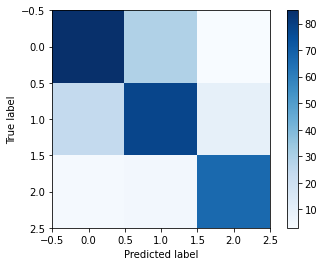

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
# Fit the Gradient Boosting Classifier model to the training data
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

# Make predictions on the test data
y_pred = GBC.predict(X_test)

# Make predictions on the training data
y_train_pred = GBC.predict(X_train)

# Make predictions on the test data
y_test_pred = GBC.predict(X_test)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


# Calculate the accuracy of the model
GBC_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", GBC_accuracy)
print(y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, GBC.predict(X_test)))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


